In [2]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cvxpy as cvx


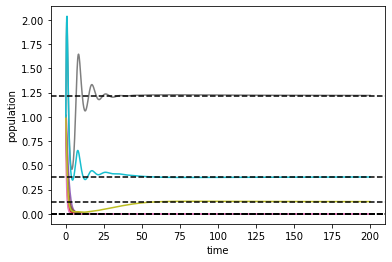

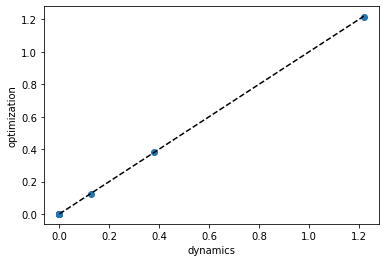

In [37]:
x_num=10
n_num=10
r_num=10
meanD=1
meanC=1
sdD=1
sdC=1

#np.random.seed(10)

statevec=np.concatenate((np.ones((x_num+n_num)),np.ones((r_num))))

D=meanD/n_num+sdD*np.random.normal(0, 1, (x_num,n_num))/np.sqrt(n_num)
C=meanC/r_num+sdC*np.random.normal(0, 1, (n_num,r_num))/np.sqrt(r_num)

mu=np.ones((x_num))
m=np.ones((n_num))
K=np.ones((r_num))

def d_statevec_dt(t,statevec):
    
    
        Xs=statevec[:x_num]
        Ns=statevec[x_num:x_num+n_num]
        Rs=statevec[x_num+n_num:]
        
        dXs=Xs*(np.dot(D,Ns)-mu)
        dNs=Ns*(np.dot(C,Rs)-m-np.dot(D.T,Xs))
        dRs=Rs*(K-Rs-np.dot(C.T,Ns))
        return np.concatenate((dXs,dNs,dRs),axis=None)

maxtime=200

steps=1000
ts = np.linspace(0,maxtime,steps)    
sol = solve_ivp(d_statevec_dt, t_span=[0,maxtime],y0=statevec,t_eval=ts,method='LSODA')
ys=sol.y.T
#plt.plot(np.sort(ys.T[x_num:x_num+n_num].T[-1]),'o')

plt.plot(ts,ys.T[x_num:x_num+n_num].T)
plt.xlabel('time')
plt.ylabel('population')
#plt.ylim(0,20)
Ns = cvx.Variable(n_num)
constraints=[D @ Ns <= mu, Ns>=0]
Q=np.dot(C,K)

prob = cvx.Problem(cvx.Minimize(-(Q.T-m)@Ns+(1/2)*cvx.quad_form(Ns, np.dot(C,C.T)) ),constraints)
prob.solve()
for value in Ns.value:
       plt.axhline(value,color='k',ls='--')
        
plt.figure()
#plt.plot(np.sort(Ns.value),'o')
#constraints[0].dual_value

#plt.ylim(0,2)
plt.xlabel("dynamics")
plt.ylabel("optimization")
plt.plot(np.sort(ys.T[x_num:x_num+n_num].T[-1]),np.sort(Ns.value),'o')
plt.plot(np.linspace(0, ys.T[x_num:x_num+n_num].T[-1].max()),np.linspace(0, ys.T[x_num:x_num+n_num].T[-1].max()), 'k--')
plt.show()
#print(ys.T[x_num:x_num+n_num].T)

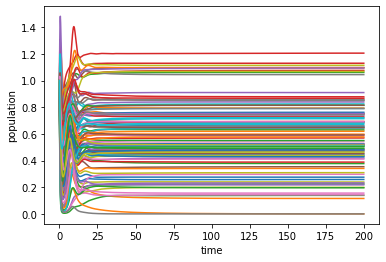

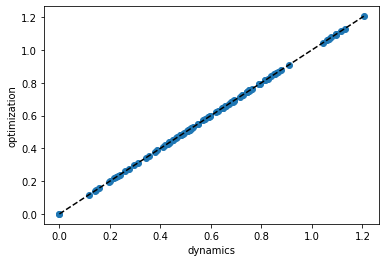

In [58]:
x_num=100
r_num=100


meanC=1
sdC=1

#np.random.seed(20)

statevec=np.ones((x_num+r_num))


C=meanC/r_num+sdC*np.random.normal(0, 1, (x_num,r_num))/np.sqrt(r_num)

m=np.ones((x_num))
K=np.ones((r_num))

def d_statevec_dt(t,statevec):
    
    
        Xs=statevec[:x_num]
        Rs=statevec[x_num:]
        dXs=Xs*(np.dot(C,Rs)-m)
        dRs=Rs*(K-Rs-np.dot(C.T,Xs))
        
        
        return np.concatenate((dXs,dRs),axis=None)

maxtime=200

steps=1000
ts = np.linspace(0,maxtime,steps)    
sol = solve_ivp(d_statevec_dt, t_span=[0,maxtime],y0=statevec,t_eval=ts,method='LSODA')
ys=sol.y.T

#plt.plot(np.sort(ys.T[x_num:x_num+n_num].T[-1]),'o')
plt.plot(ts,ys.T[x_num:].T)


#plt.plot(ts,ys[:, :x_num].T)
plt.xlabel('time')
plt.ylabel('population')

Rs = cvx.Variable(r_num)
constraints=[C@Rs <= m,Rs>=0]


prob = cvx.Problem(cvx.Minimize(cvx.quad_form(Rs-K,np.identity(r_num))),
                         constraints)
prob.solve()
plt.figure()
#plt.plot(np.sort(Ns.value),'o')
#constraints[0].dual_value
#for value in Ns.value:
 #      plt.axhline(value)
#plt.ylim(0,2)
plt.xlabel("dynamics")
plt.ylabel("optimization")
plt.plot(np.sort(ys.T[x_num:].T[-1]),np.sort(Rs.value),'o')
plt.plot(np.linspace(0, ys.T[x_num:].T[-1].max()),np.linspace(0, ys.T[x_num:].T[-1].max()), 'k--')

plt.show()
#print(ys.T[x_num:x_num+n_num].T)


<AxesSubplot:ylabel='Count'>

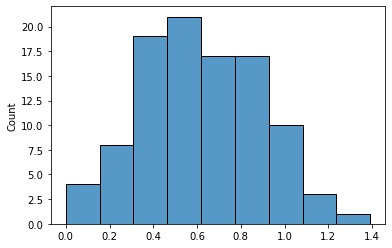

In [57]:
sns.histplot(ys.T[x_num:].T[-1])